<a href="https://colab.research.google.com/github/Narachii/tensorflow_basics/blob/sequence_model/RM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

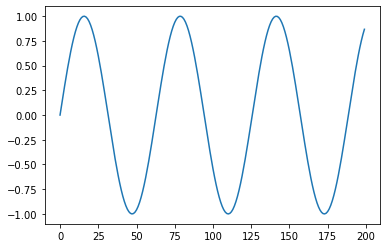

In [5]:
series = np.sin(0.1 * np.arange(200)) # + np.random.randn(200) * 0.1 #noise
plt.plot(series)
plt.show()

In [80]:
### build the dataset
T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T] # ex. 1:10
  X.append(x)
  y = series[t+T] # ex. 10
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print('X shape', X.shape, 'Y shape', Y.shape)

X shape (190, 10) Y shape (190,)


In [81]:
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer= Adam(lr=0.1),
)

r = model.fit(
    X[:-N //2], Y[:-N // 2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
3/3 [==============================] - 0s 22ms/step - loss: 0.4256 - val_loss: 0.2903
Epoch 2/80
3/3 [==============================] - 0s 11ms/step - loss: 0.1992 - val_loss: 0.1397
Epoch 3/80
3/3 [==============================] - 0s 12ms/step - loss: 0.1048 - val_loss: 0.0362
Epoch 4/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0156 - val_loss: 0.0453
Epoch 5/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0439 - val_loss: 0.0298
Epoch 6/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0315 - val_loss: 0.0491
Epoch 7/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0449 - val_loss: 0.0276
Epoch 8/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0288 - val_loss: 0.0288
Epoch 9/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0187 - val_loss: 0.0080
Epoch 10/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0130 - val_loss: 0.0072
Epoch 11/80
3/3 [============

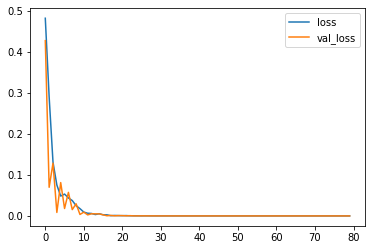

In [74]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [0]:
## Prediction
# Wron forecast using true targets

validation_target = Y[-N // 2:]
validation_predictions = []

# index of first validation input
i = -N //2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0, 0] #return scalar
  i += 1

  validation_predictions.append(p)

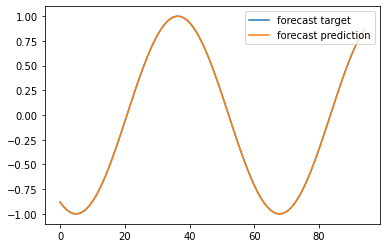

In [79]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [0]:
# For cast future values 
validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0, 0] #return scalar

  # update the prediction list
  validation_predictions.append(p)

  # make the new input 
  last_x = np.roll(last_x, -1) #shift the first value to the last
  last_x[-1] = p # change the last value to the prediction

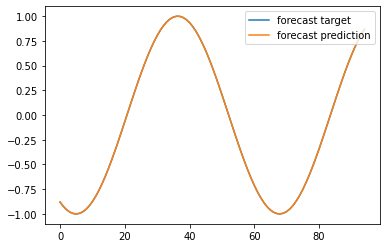

In [83]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()